In [1]:
import os
import shutil
import random
import tensorflow as tf
import mlxtend
import pandas as pd


In [38]:
import os
import shutil
import random
import tensorflow as tf
import mlxtend
import pandas as pd

imgPath = './data/Img/'

for fichier in os.listdir(imgPath):
    if os.path.isfile(os.path.join(imgPath, fichier)):

        filename = os.path.splitext(fichier)[0]
        prefixe = filename.split('-')[0]
        
        subFolder = os.path.join(imgPath, prefixe)
        
        if not os.path.exists(subFolder):
            os.makedirs(subFolder)
        
        # Déplacement du fichier dans le sous-dossier correspondant
        shutil.move(os.path.join(imgPath, fichier), subFolder)

print("Opération terminée avec succès.")


Opération terminée avec succès.


In [39]:
# Génération des noms de dossier
def generer_noms_dossier():
    lettres_maj = [chr(i) for i in range(65, 91)]
    lettres_min = [chr(i) for i in range(97, 123)]
    chiffres = [str(i) for i in range(10)]
    for chiffre in chiffres:
        yield 'num_' + chiffre
    for lettre_maj in lettres_maj:
        yield 'maj_' + lettre_maj
    for lettre_min in lettres_min:
        yield 'min_' + lettre_min

# Parcours des sous-dossiers dans le dossier
subsFolders = [dossier for dossier in os.listdir(imgPath) if os.path.isdir(os.path.join(imgPath, dossier))]
namesFolder = generer_noms_dossier()

for oldName, newName in zip(subsFolders, namesFolder):
    oldPath = os.path.join(imgPath, oldName)
    newPath = os.path.join(imgPath, str(newName))
    os.rename(oldPath, newPath)

print("Opération terminée avec succès.")


Opération terminée avec succès.


In [40]:
trainPath = 'data/train/'

if not os.path.exists(trainPath):
    os.makedirs(trainPath)

for dossier in os.listdir(imgPath):
    pathFolder = os.path.join(imgPath, dossier)
    if os.path.isdir(pathFolder):
        images = os.listdir(pathFolder)

        # Calcul du nombre d'images à copier (environ 80%)
        nbTotalImg = len(images)
        nbCopyImg = int(0.8 * nbTotalImg)

        # Sélection aléatoire d'images sans remplacement
        copyImg = random.sample(images, nbCopyImg)
        
        trainFolder = os.path.join(trainPath, dossier)
        if not os.path.exists(trainFolder):
            os.makedirs(trainFolder)

        # Déplacement des images sélectionnées vers img/train
        for img in copyImg:
            pathSourceImg = os.path.join(pathFolder, img)
            pathTargetImg = os.path.join(trainFolder, img)
            shutil.move(pathSourceImg, pathTargetImg)

print("Opération terminée avec succès.")

Opération terminée avec succès.


In [41]:
# Renomme le dossier 'Img' en 'validation
oldFold = './data/Img'
newFold = './data/validation'

os.rename(oldFold, newFold)

print("Dossier renommé avec succès.")

Dossier renommé avec succès.


In [11]:
import os

TRAINING_DIR = "data/train"

# Boucler sur les sous-dossiers du dossier de formation
for subdir in os.listdir(TRAINING_DIR):
    subdir_path = os.path.join(TRAINING_DIR, subdir)
    if os.path.isdir(subdir_path):
        print("Sous-dossier:", subdir)
        files = os.listdir(subdir_path)
        print("Nombre total d'images:", len(files))


Sous-dossier: maj_A
Nombre total d'images: 44
Sous-dossier: maj_B
Nombre total d'images: 44
Sous-dossier: maj_C
Nombre total d'images: 44
Sous-dossier: maj_D
Nombre total d'images: 44
Sous-dossier: maj_E
Nombre total d'images: 44
Sous-dossier: maj_F
Nombre total d'images: 44
Sous-dossier: maj_G
Nombre total d'images: 44
Sous-dossier: maj_H
Nombre total d'images: 44
Sous-dossier: maj_I
Nombre total d'images: 44
Sous-dossier: maj_J
Nombre total d'images: 44
Sous-dossier: maj_K
Nombre total d'images: 44
Sous-dossier: maj_L
Nombre total d'images: 44
Sous-dossier: maj_M
Nombre total d'images: 44
Sous-dossier: maj_N
Nombre total d'images: 44
Sous-dossier: maj_O
Nombre total d'images: 44
Sous-dossier: maj_P
Nombre total d'images: 44
Sous-dossier: maj_Q
Nombre total d'images: 44
Sous-dossier: maj_R
Nombre total d'images: 44
Sous-dossier: maj_S
Nombre total d'images: 44
Sous-dossier: maj_T
Nombre total d'images: 44
Sous-dossier: maj_U
Nombre total d'images: 44
Sous-dossier: maj_V
Nombre total d

In [1]:
import tensorflow as tf


# Définition du modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)     

In [43]:
# Injecter les images depuis l'arborescence des dossiers
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    "data/train", # path du train 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical', 
    seed = 42
)

val_gen = val_datagen.flow_from_directory(
    "data/validation", # path du validation 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical', 
    seed = 42
)
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.


In [44]:
history = model.fit(train_gen, epochs=25, validation_data = val_gen)

Epoch 1/25
86/86 [==============================] - 22s 252ms/step - loss: 3.2769 - accuracy: 0.1994 - val_loss: 2.3131 - val_accuracy: 0.4076
Epoch 2/25
86/86 [==============================] - 21s 241ms/step - loss: 1.5942 - accuracy: 0.5715 - val_loss: 1.7821 - val_accuracy: 0.5381
Epoch 3/25
86/86 [==============================] - 21s 250ms/step - loss: 0.7478 - accuracy: 0.7779 - val_loss: 2.0206 - val_accuracy: 0.5499
Epoch 4/25
86/86 [==============================] - 21s 244ms/step - loss: 0.3197 - accuracy: 0.9069 - val_loss: 2.0800 - val_accuracy: 0.5762
Epoch 5/25
86/86 [==============================] - 21s 247ms/step - loss: 0.1728 - accuracy: 0.9542 - val_loss: 2.5917 - val_accuracy: 0.5425
Epoch 6/25
86/86 [==============================] - 21s 245ms/step - loss: 0.1143 - accuracy: 0.9714 - val_loss: 1.9379 - val_accuracy: 0.6100
Epoch 7/25
86/86 [==============================] - 22s 261ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 2.3539 - val_accuracy: 0.6158

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))
  
  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

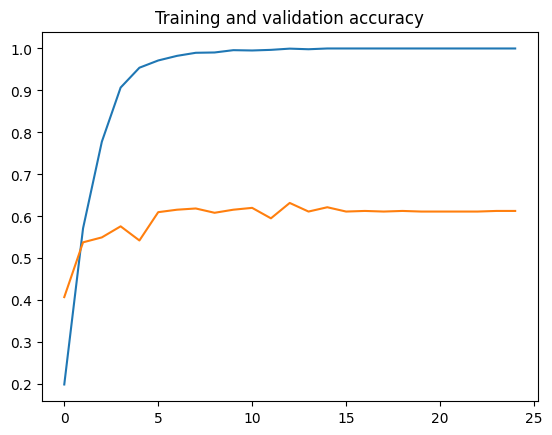

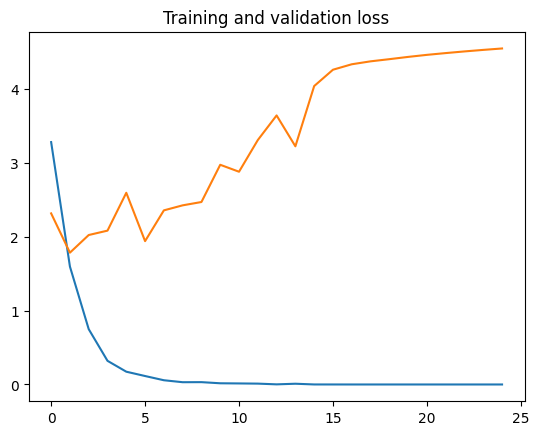

In [46]:
diagnostic_learning_curves()

<!-- batch_size = 64 -->

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))
  
  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

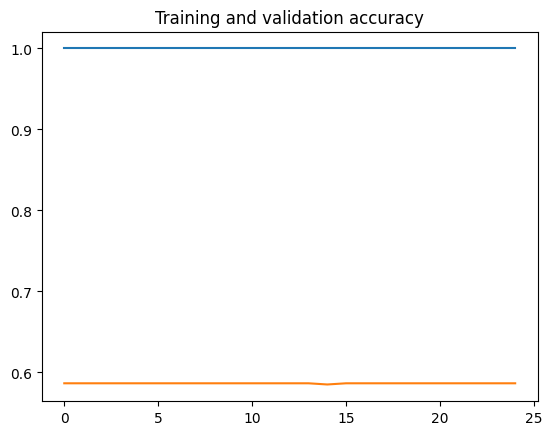

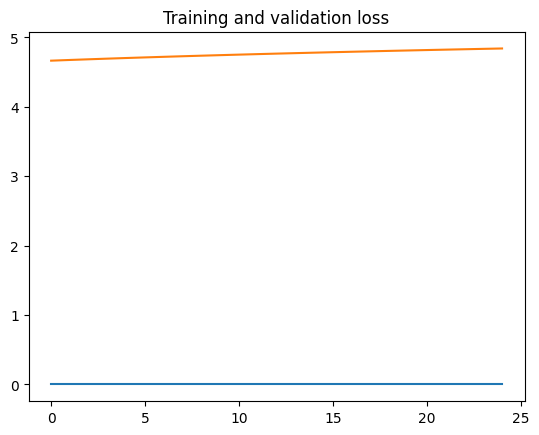

In [32]:
diagnostic_learning_curves()

<!-- batch_size = 126 -->

In [21]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))
  
  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

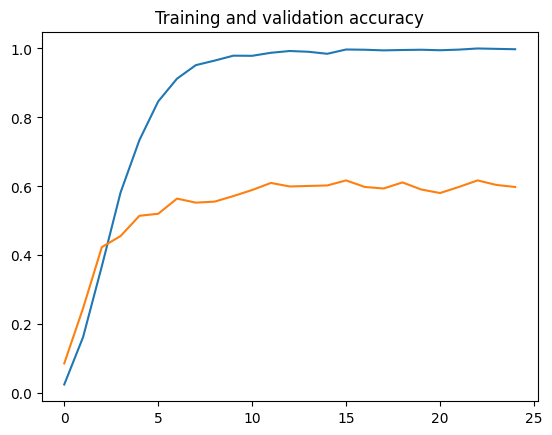

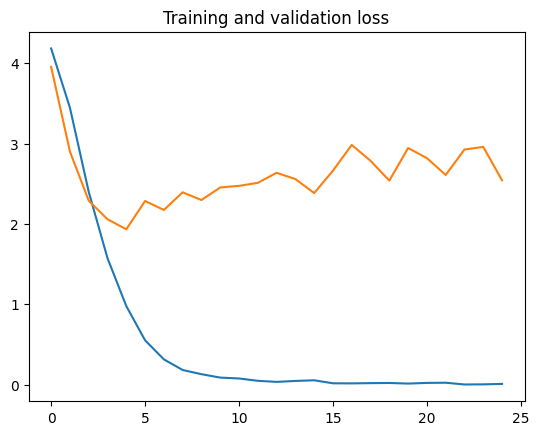

In [22]:
diagnostic_learning_curves()